In [1]:
from agents import ConsumerProducer, Influencer, ImperfectConsumerProducer
from content_market import ContentMarket
import numpy as np
from stats import TestStats

In [2]:
num_influencers = 1
num_consumer_producers = 15

production_rate = 1
external_production_rate = 1

topics = [[-1, 1]]
topics = np.array(topics)

In [3]:
content_market = ContentMarket(topics, production_rate, external_production_rate)

In [4]:
from util import exponential_decay, inverse_decay, tanh_decay

In [5]:
agent_colors = dict()

for i in range(num_consumer_producers):
    cons_func = lambda x: inverse_decay(x, 1, 2)
    prod_func = lambda x: inverse_decay(x, 1, 2)
    consumer_producer = ConsumerProducer(prod_func, cons_func, 20, 3, 1, init_following_rates_method='equal')
    #consumer_producer = ImperfectConsumerProducer(prod_func, cons_func, 10, 3, 1, init_following_rates_method='zero')
    content_market.add_agent(consumer_producer)

    color = np.random.rand(3,)
    agent_colors[consumer_producer.index] = color

for i in range(num_influencers):
    influencer = Influencer(40, 1, init_following_rates_method='equal')
    content_market.add_agent(influencer)

    color = np.random.rand(3,)
    agent_colors[influencer.index] = color

In [6]:
import matplotlib.pyplot as plt
import visualize

In [7]:
content_market.finalize(method='even')

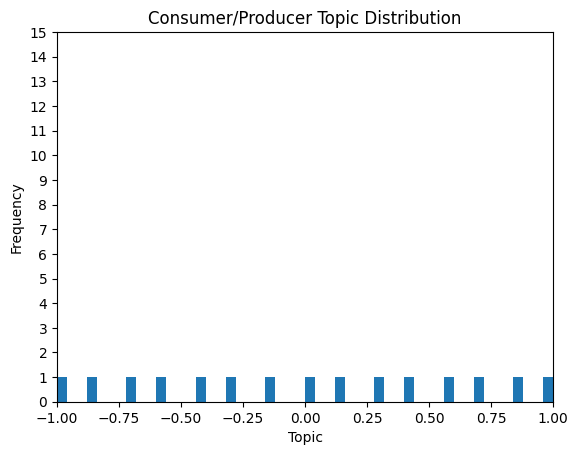

In [8]:
visualize.plot_topic_distribution_histogram("Consumer/Producer Topic Distribution", content_market.consumers, -1, 1)

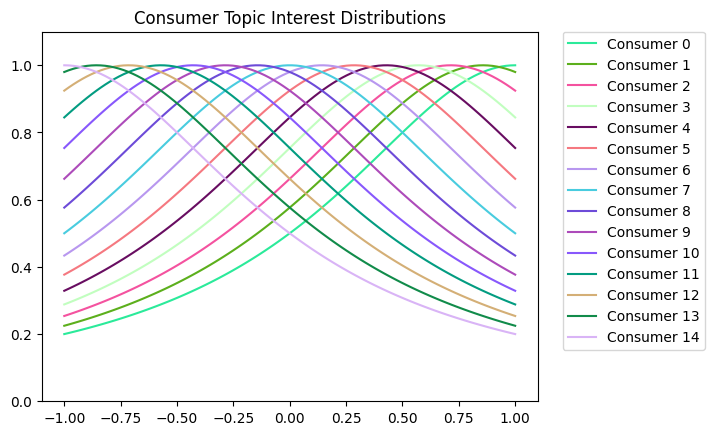

In [9]:
visualize.plot_consumer_topic_interest_distributions("Consumer Topic Interest Distributions", content_market.consumers, -1, 1, agent_colors)

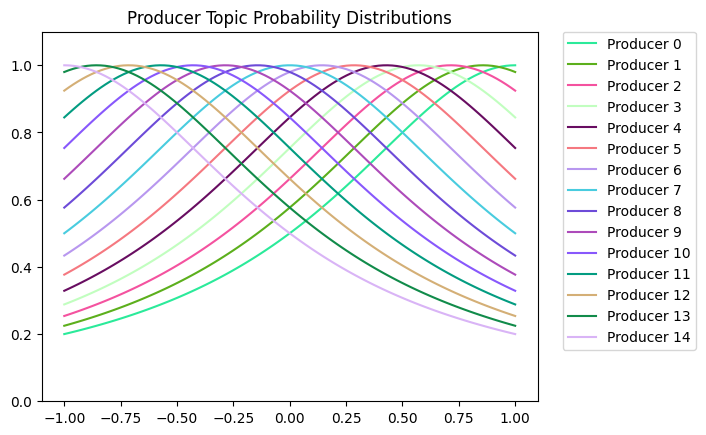

In [10]:
visualize.plot_producer_topic_probability_distributions("Producer Topic Probability Distributions", content_market.producers, -1, 1, agent_colors)

In [11]:
stats: TestStats = content_market.optimize(100, basinhop=True)

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing consumer 10
Optimizing consumer 11
Optimizing consumer 12
Optimizing consumer 13
Optimizing consumer 14
Optimizing influencer 15
Optimizing producer 0
Optimization succeeded (overall 0.5958011250477284s): nit=100, nfev=1240, njev=620.
Optimizing producer 1
Optimization succeeded (overall 0.5893583750585094s): nit=100, nfev=1210, njev=605.
Optimizing producer 2
Optimization succeeded (overall 0.6373767909826711s): nit=100, nfev=1248, njev=624.
Optimizing producer 3
Optimization succeeded (overall 0.5966506670229137s): nit=100, nfev=1242, njev=621.
Optimizing producer 4
Optimization succeeded (overall 0.6046021659858525s): nit=100, nfev=1222, njev=611.
Optimizing producer 5
Optimization succeeded (overall 0.5683371659833938s): nit=100, nfev=1202, njev=601.
Opti

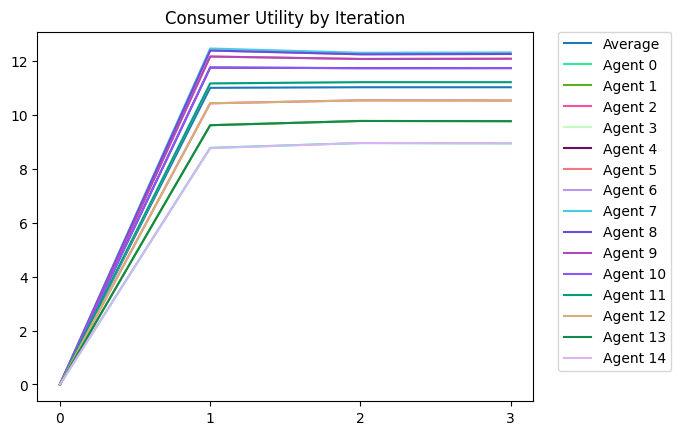

In [12]:
visualize.plot_agent_utility_by_iteration("Consumer Utility by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_utility)

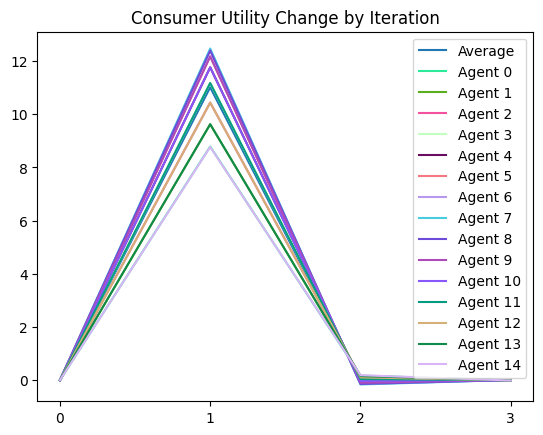

In [13]:
visualize.plot_agent_utility_change_by_iteration("Consumer Utility Change by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_utility_change)

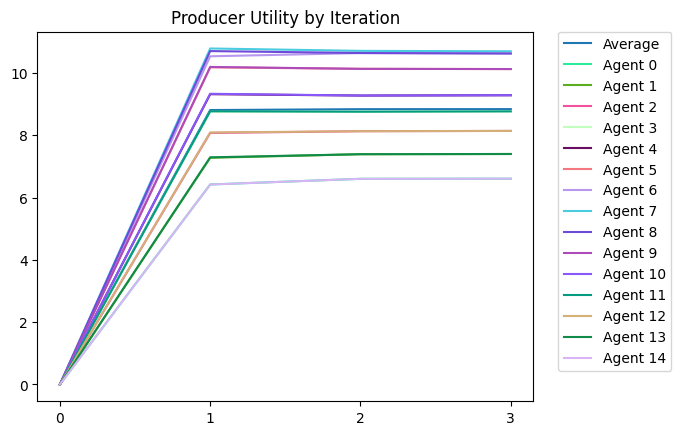

In [14]:
visualize.plot_agent_utility_by_iteration("Producer Utility by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_utility)

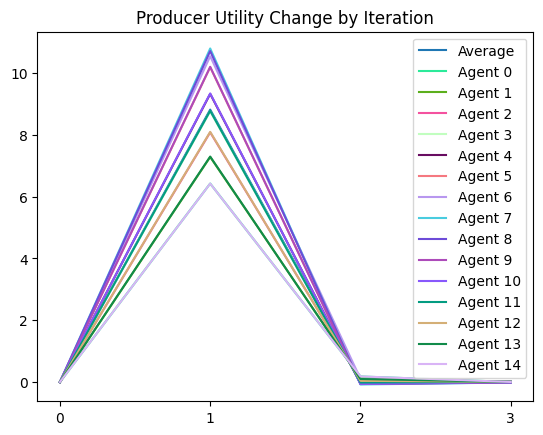

In [15]:
visualize.plot_agent_utility_change_by_iteration("Producer Utility Change by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_utility_change)

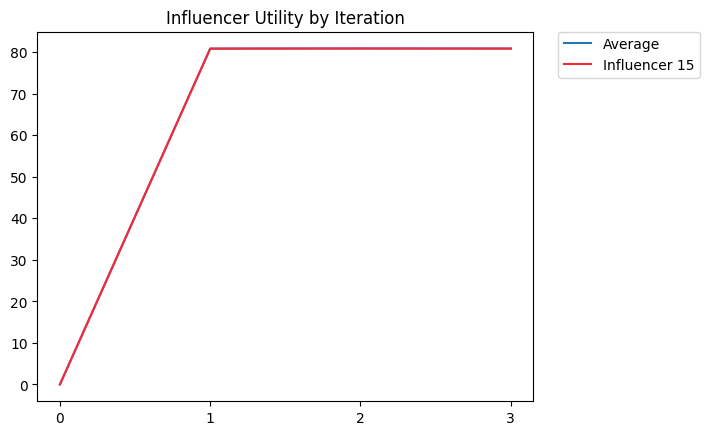

In [16]:
visualize.plot_agent_utility_by_iteration("Influencer Utility by Iteration", content_market.influencers, agent_colors, stats.influencer_stats, stats.average_influencer_utility)

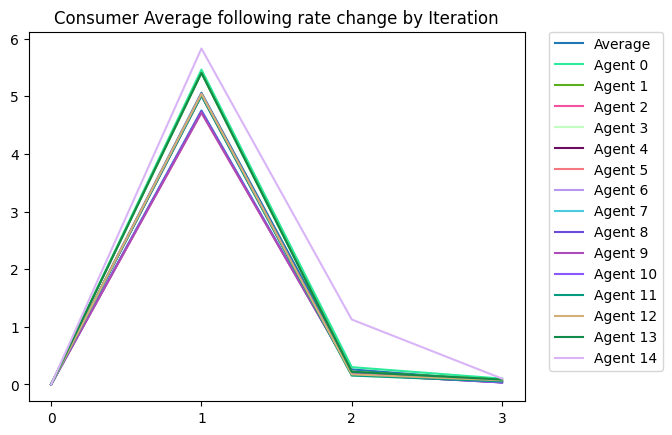

In [17]:
visualize.plot_following_rate_change_by_iteration("Consumer Average following rate change by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_rate_change)

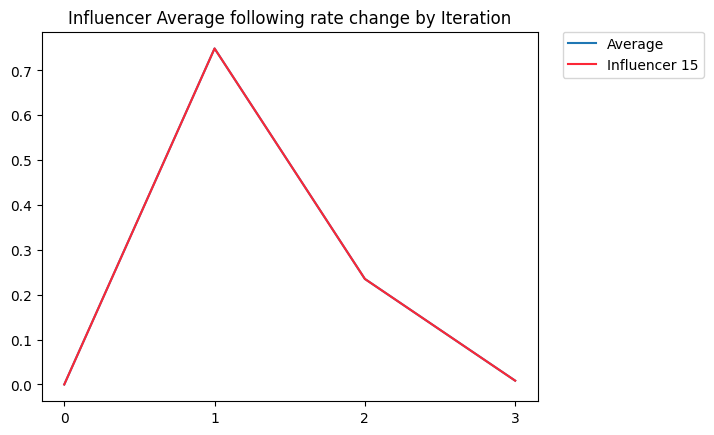

In [18]:
visualize.plot_following_rate_change_by_iteration("Influencer Average following rate change by Iteration", content_market.influencers, agent_colors, stats.influencer_stats, stats.average_influencer_rate_change)

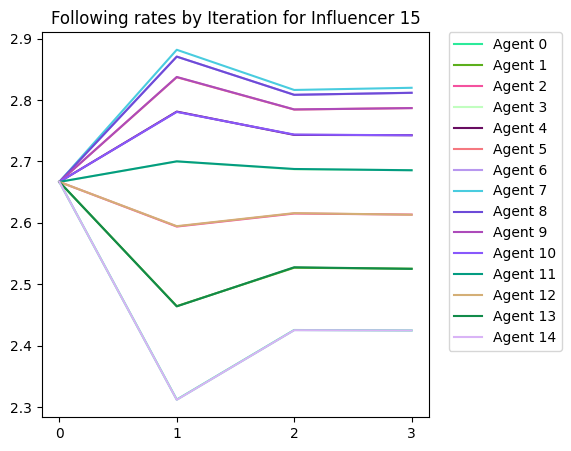

In [19]:
visualize.plot_following_rates_by_iteration(content_market.influencers, content_market.producers, agent_colors, stats.influencer_stats)

In [41]:
content_market.influencers[0].get_following_rate_vector()

array([2.42464999, 2.52520027, 2.61340004, 2.68577827, 2.74271767,
       2.78693193, 2.81164349, 2.81996481, 2.81186658, 2.78684781,
       2.74257252, 2.68560042, 2.61319944, 2.52499852, 2.42462825,
       0.        , 0.        ])

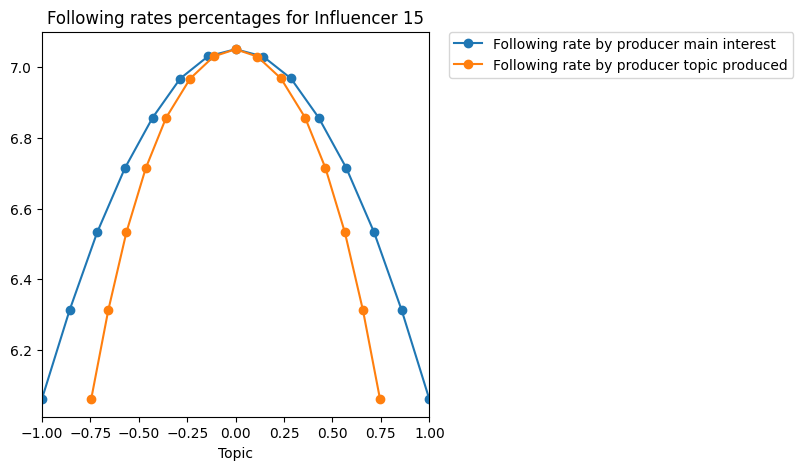

In [20]:
visualize.plot_agent_following_rates(content_market.influencers, stats.influencer_stats, agent_colors)

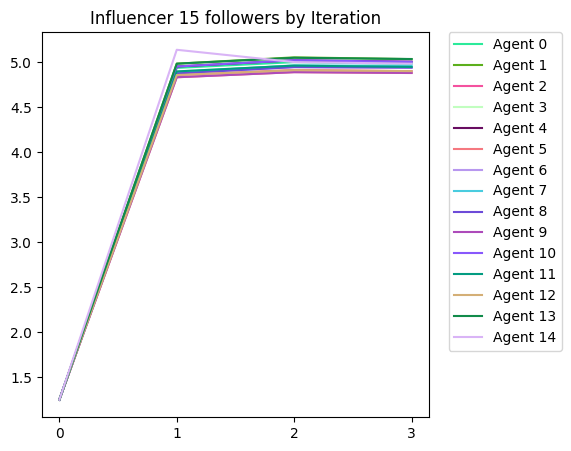

In [21]:
visualize.plot_follows_by_iteration(content_market.influencers, content_market.consumers, agent_colors, stats.consumer_stats)

In [40]:
[p.topic_produced for p in content_market.producers]

[array([0.74545586]),
 array([0.65728498]),
 array([0.56360635]),
 array([0.46368904]),
 array([0.35876214]),
 array([0.234336]),
 array([0.11267665]),
 array([4.88856116e-06]),
 array([-0.11266237]),
 array([-0.23435525]),
 array([-0.35875698]),
 array([-0.46368367]),
 array([-0.56359912]),
 array([-0.65729142]),
 array([-0.74545611])]

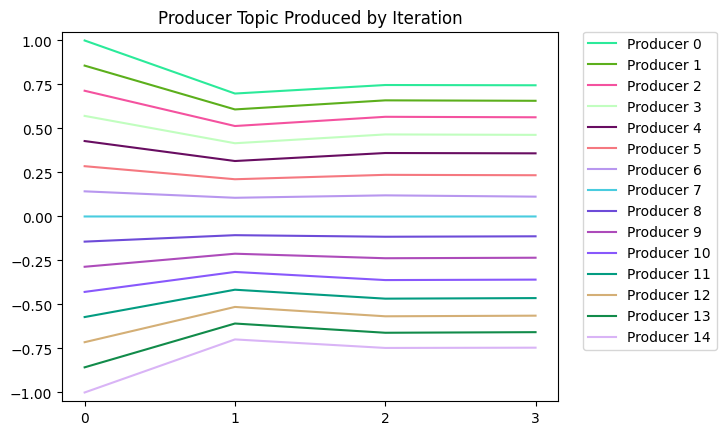

In [22]:
visualize.plot_producer_topic_produced_by_iteration("Producer Topic Produced by Iteration", content_market.producers, content_market.consumers, agent_colors, stats.producer_stats, False)

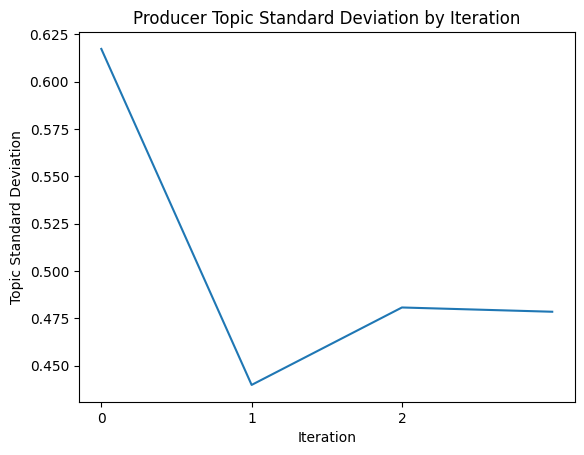

In [23]:
visualize.plot_value_by_iteration("Producer Topic Standard Deviation by Iteration", stats, "producer_topic_standard_deviation", "Topic Standard Deviation")

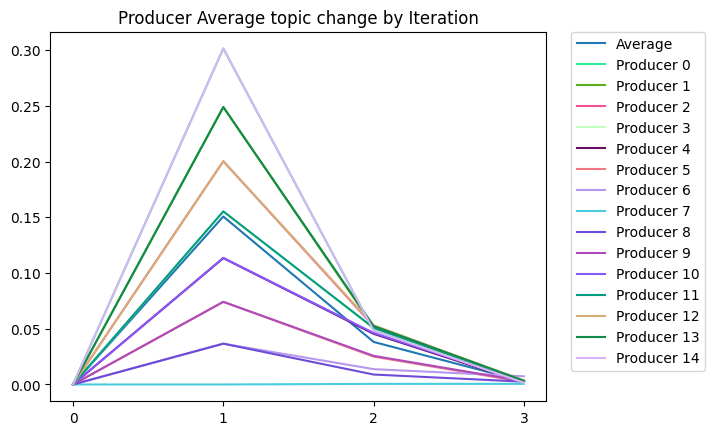

In [24]:
visualize.plot_producer_topic_change_by_iteration("Producer Average topic change by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_topic_change)

In [42]:
stats.total_social_welfare[-1]

165.4351216549787

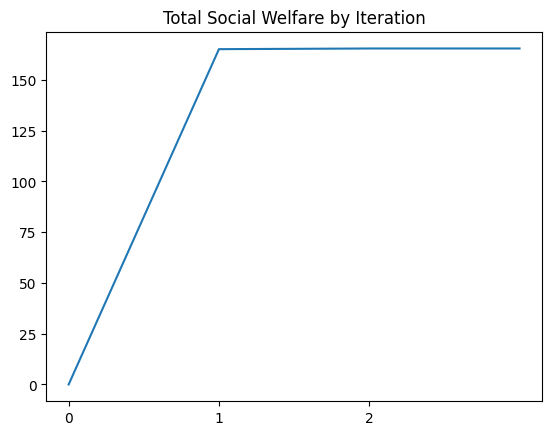

In [25]:
visualize.plot_total_social_welfare_by_iteration("Total Social Welfare by Iteration", stats)

In [26]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

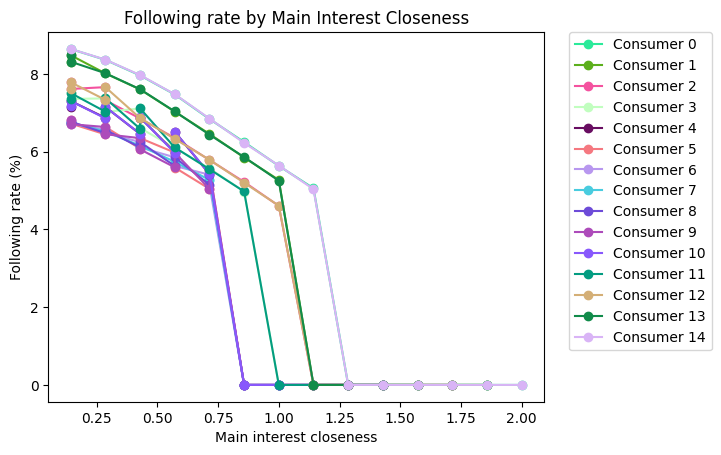

In [27]:
visualize.plot_following_rate_by_main_interest_closeness("Following rate by Main Interest Closeness", content_market.consumers, content_market.producers, agent_colors, stats.consumer_stats)

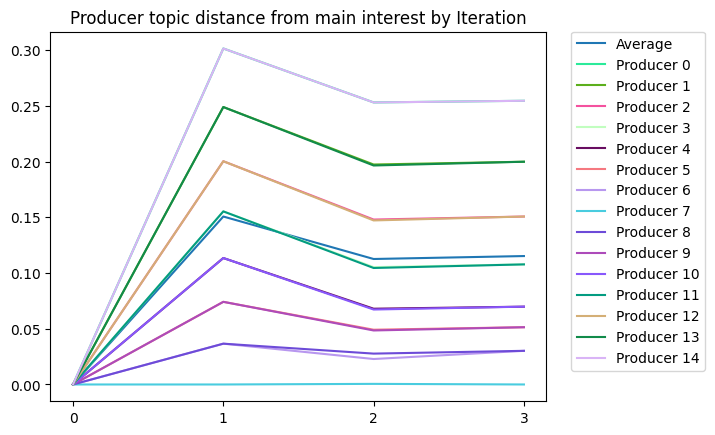

In [28]:
visualize.plot_producer_topic_distance_from_main_interest_by_iteration("Producer topic distance from main interest by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_topic_distance_from_main_interest)

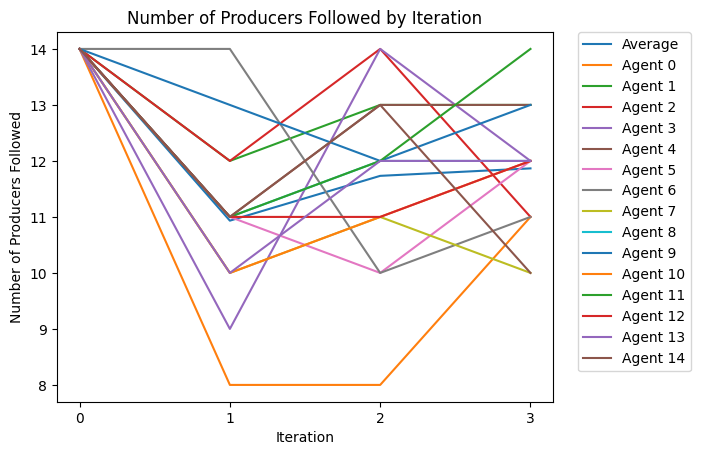

In [29]:
visualize.plot_value_by_agent_by_iteration("Number of Producers Followed by Iteration", stats.consumer_stats, "num_producers_followed", "Number of Producers Followed", stats.average_consumer_num_producers_followed)

[[ 1.         -0.01503759]
 [-0.01503759  1.        ]]


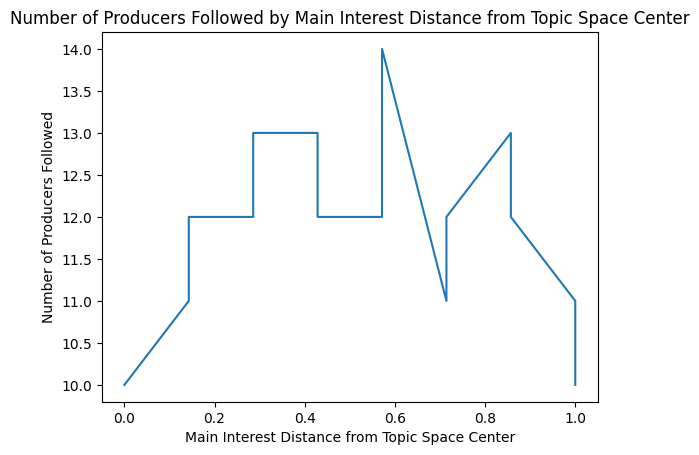

In [30]:
num_prods_by_main_interest_magnitude = []
topic_center = np.array([(bound[0] + bound[1]) / 2 for bound in content_market.topics_bounds])

for consumer in content_market.consumers:
    main_interest_mag = np.linalg.norm(consumer.main_interest - topic_center)
    num_prods_by_main_interest_magnitude.append((main_interest_mag, stats.consumer_stats[consumer.index].num_producers_followed[-1]))

num_prods_by_main_interest_magnitude.sort(key=lambda x: x[0])
print(np.corrcoef([x[0] for x in num_prods_by_main_interest_magnitude], [x[1] for x in num_prods_by_main_interest_magnitude]))
plt.figure()
plt.plot([x[0] for x in num_prods_by_main_interest_magnitude], [x[1] for x in num_prods_by_main_interest_magnitude])
plt.xlabel("Main Interest Distance from Topic Space Center")
plt.ylabel("Number of Producers Followed")
plt.title("Number of Producers Followed by Main Interest Distance from Topic Space Center")
plt.show()

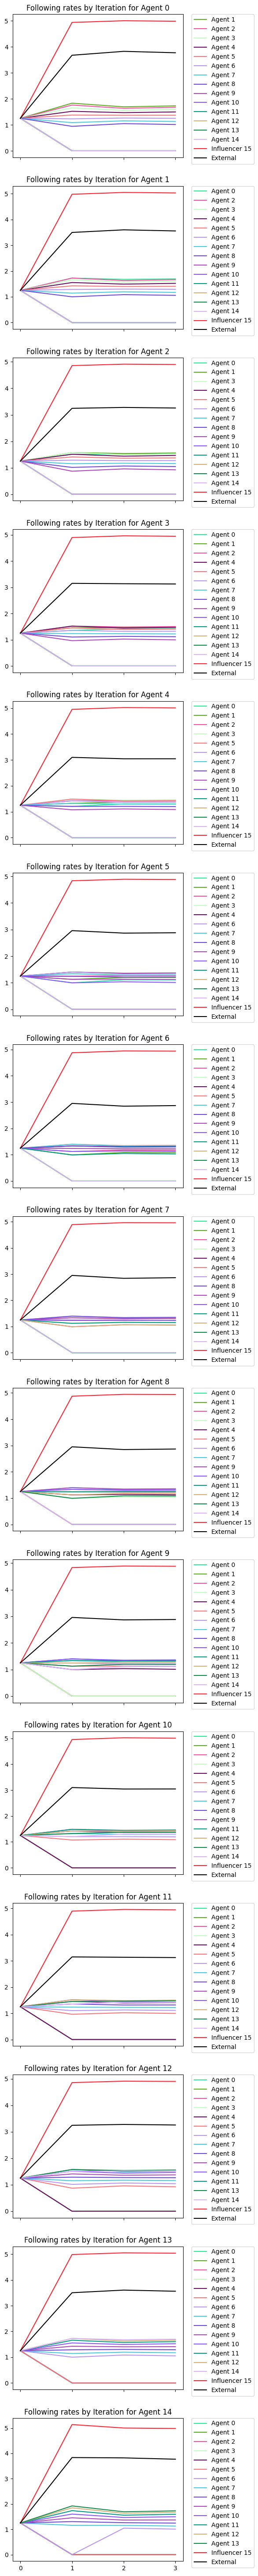

In [31]:
visualize.plot_following_rates_by_iteration(content_market.consumers, sorted(list(set(content_market.producers + content_market.influencers)), key=lambda x: x.index), agent_colors, stats.consumer_stats)

In [32]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

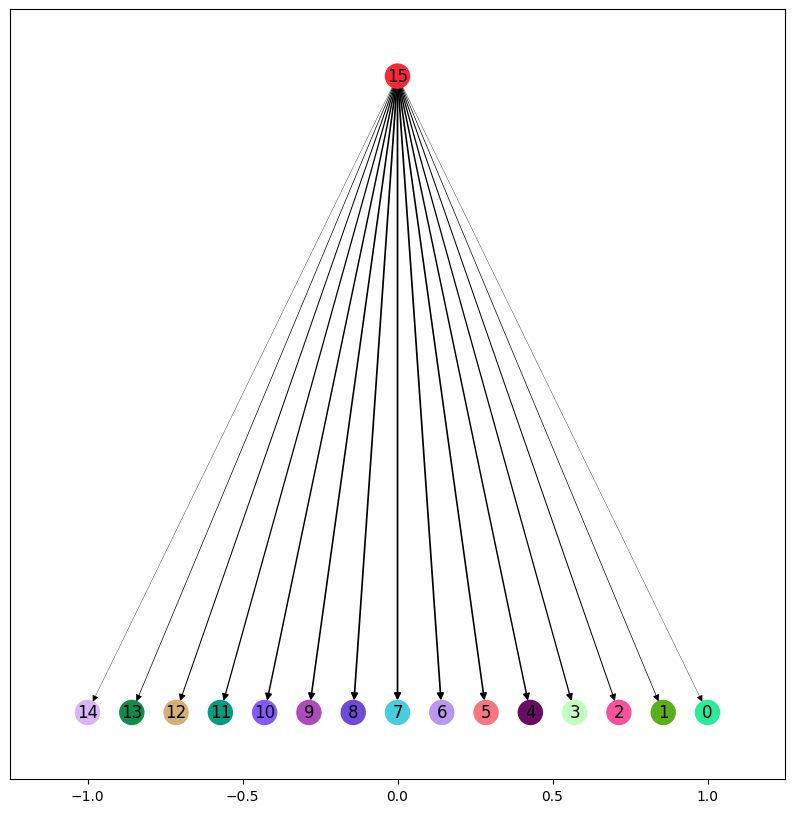

In [33]:
visualize.visualize_influencer(content_market, stats.influencer_stats[content_market.influencers[0].index], agent_colors)

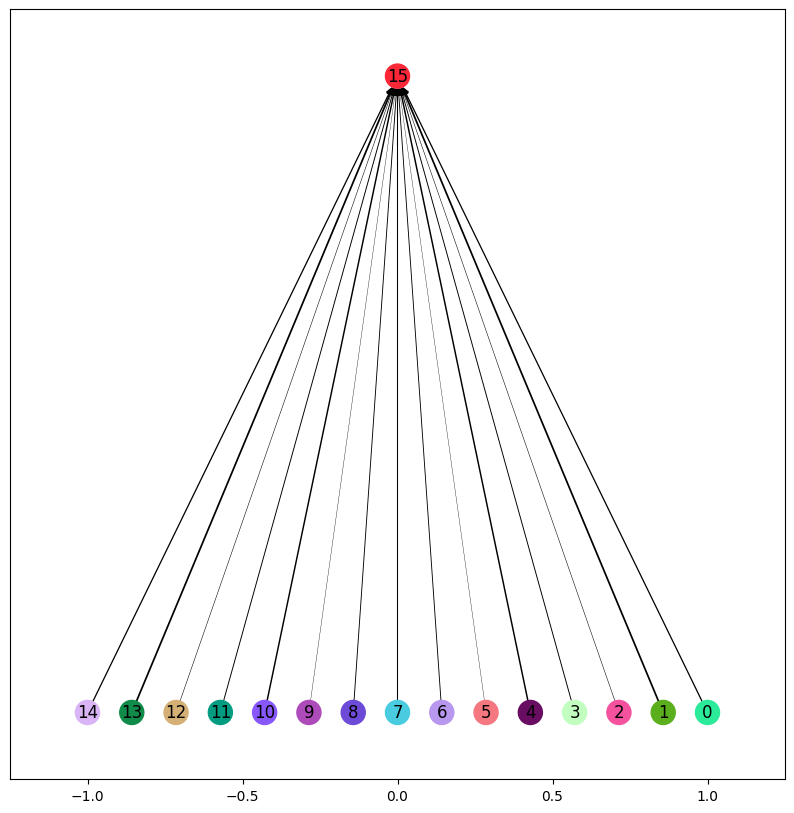

In [34]:
visualize.visualize_influencer_followers(content_market, stats.consumer_stats, agent_colors)

{0: (1.0, 0), 1: (0.857142857142857, 0), 2: (0.7142857142857142, 0), 3: (0.5714285714285714, 0), 4: (0.4285714285714284, 0), 5: (0.2857142857142856, 0), 6: (0.1428571428571428, 0), 7: (0.0, 0), 8: (-0.1428571428571429, 0), 9: (-0.2857142857142858, 0), 10: (-0.4285714285714286, 0), 11: (-0.5714285714285714, 0), 12: (-0.7142857142857143, 0), 13: (-0.8571428571428572, 0), 14: (-1.0, 0), 15: (0, 1), 'External': (1, 1)}


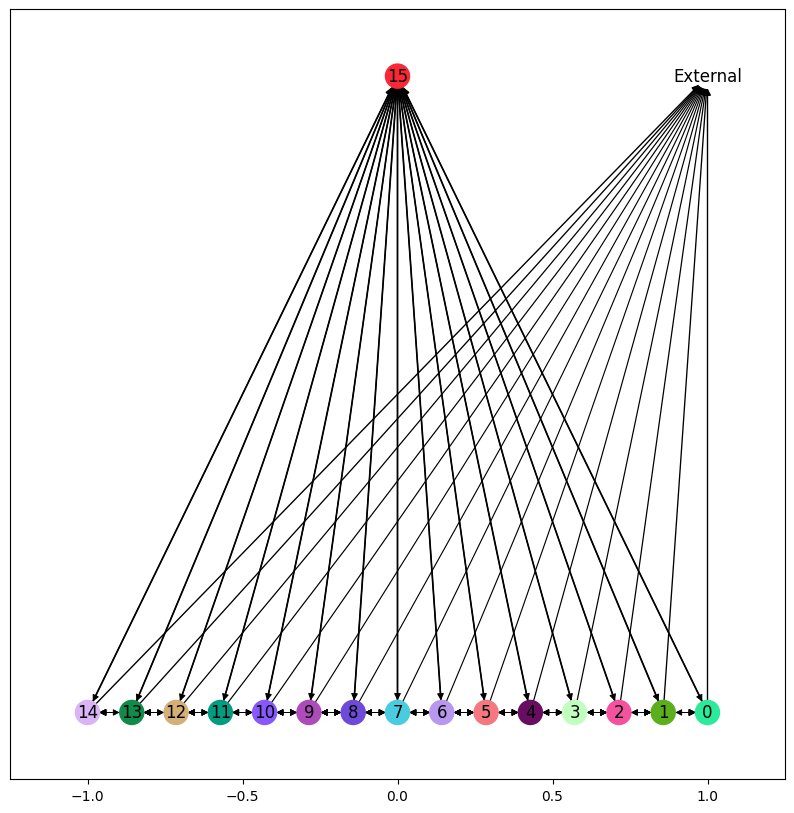

In [35]:
visualize.visualize_market(content_market, stats, agent_colors)

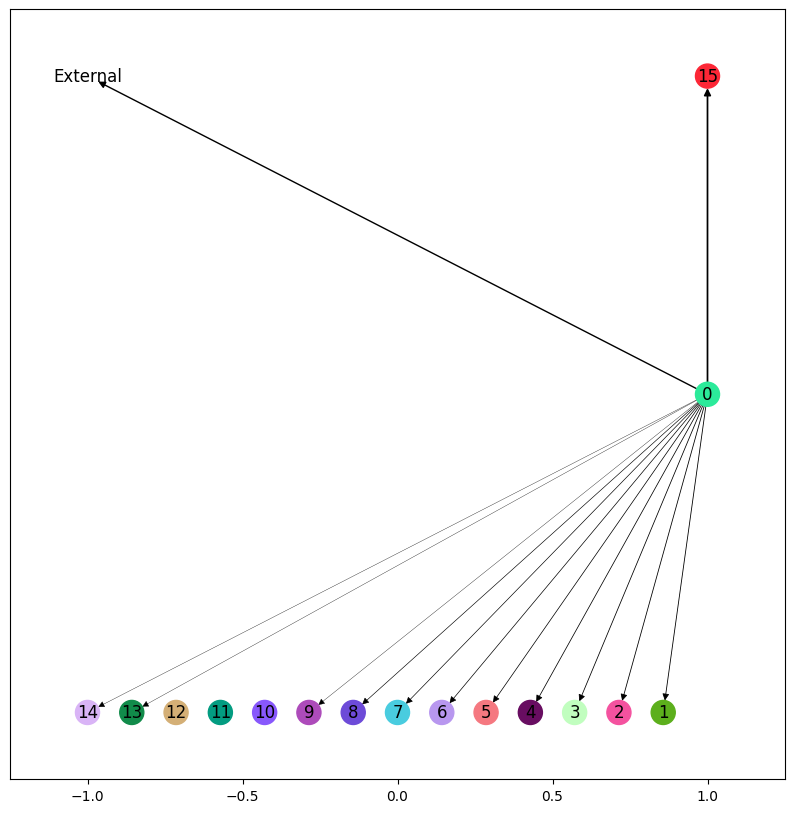

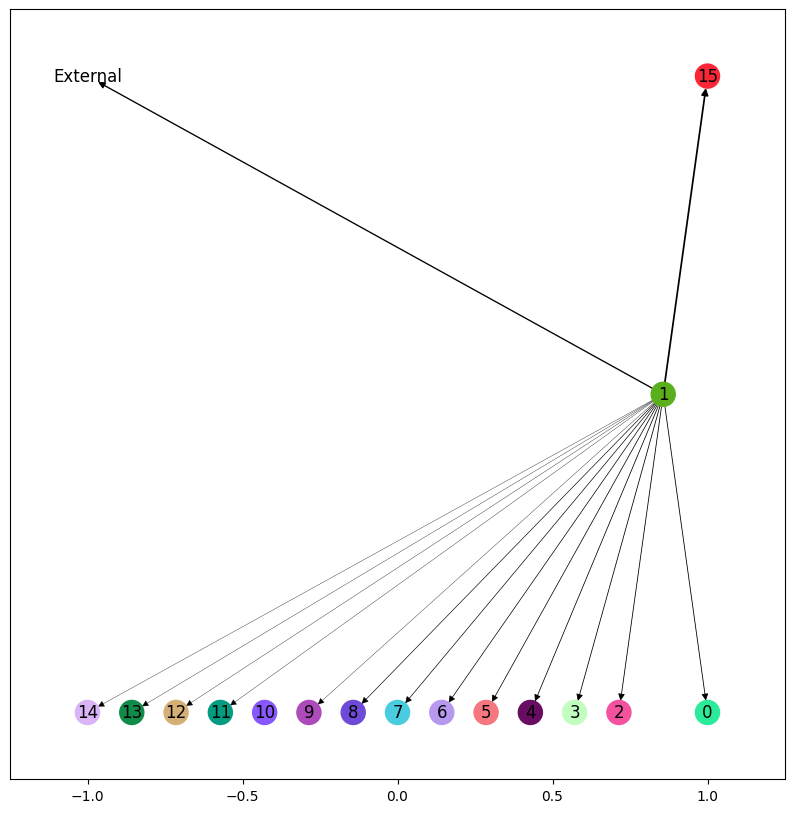

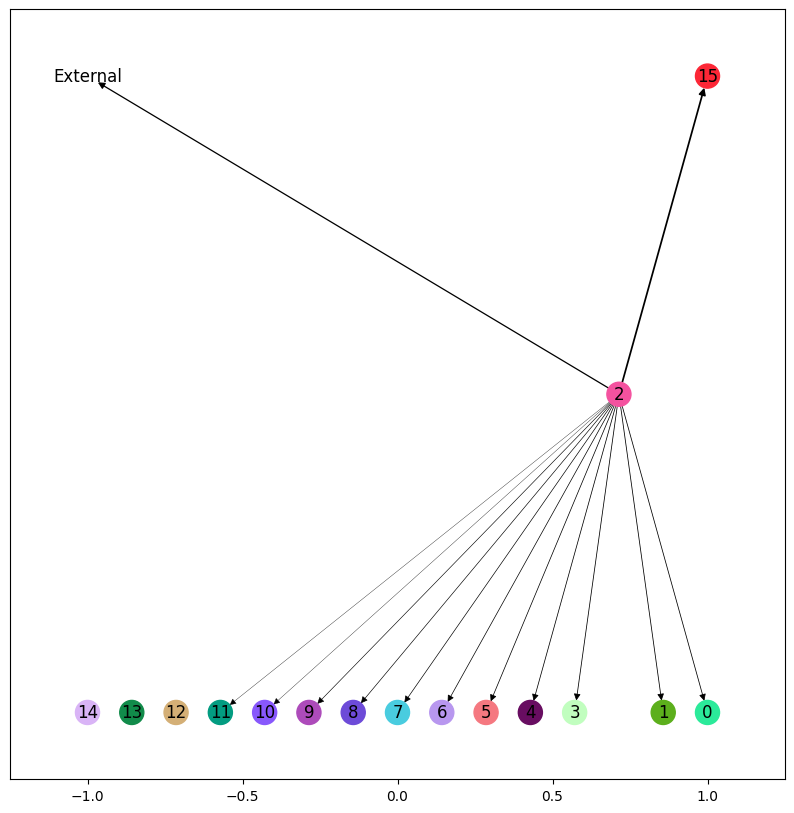

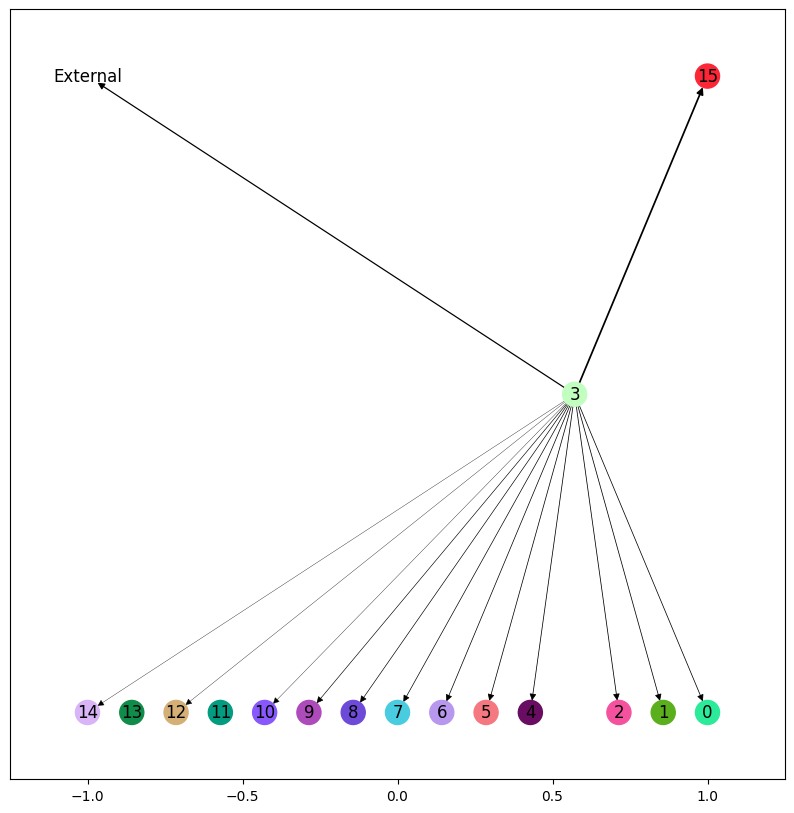

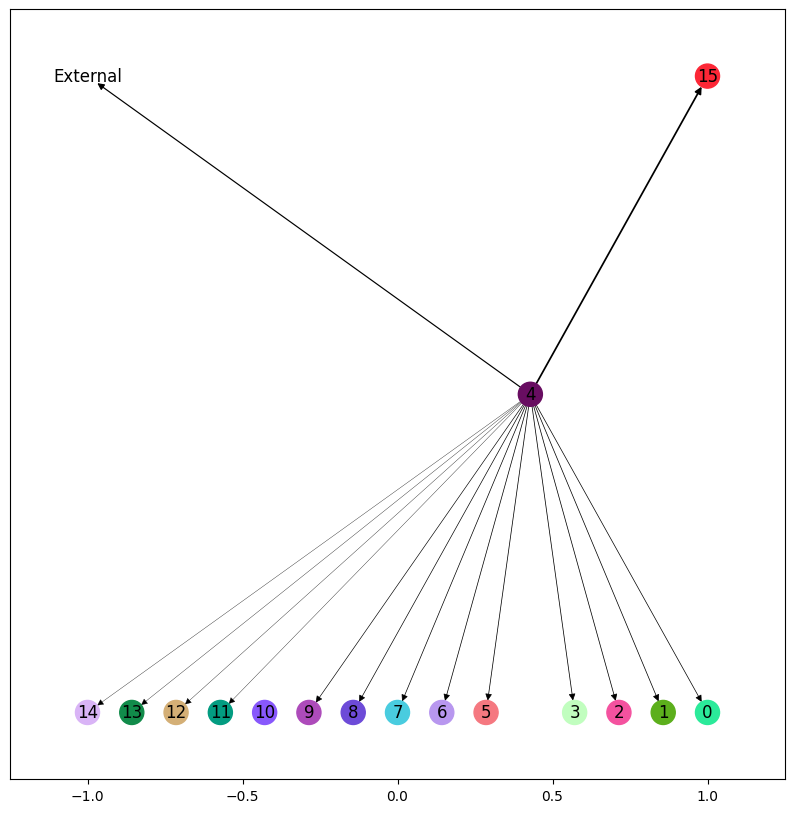

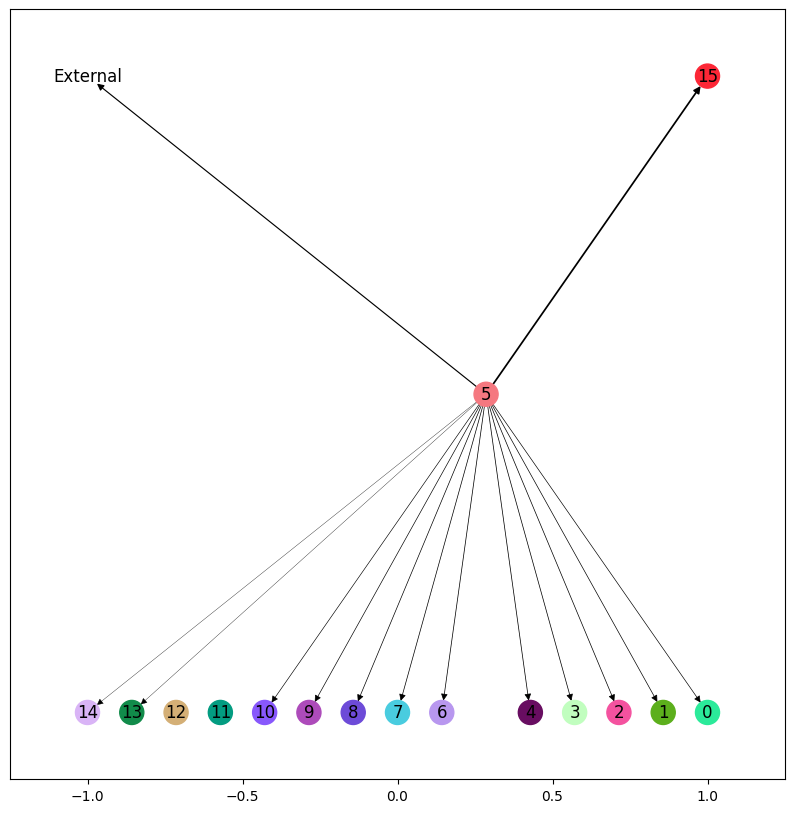

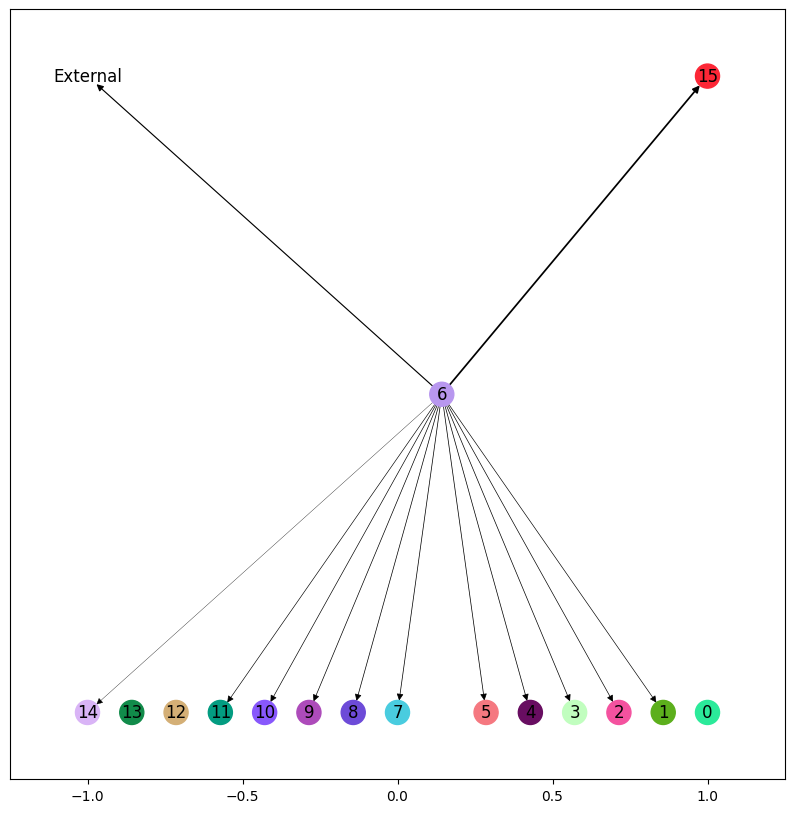

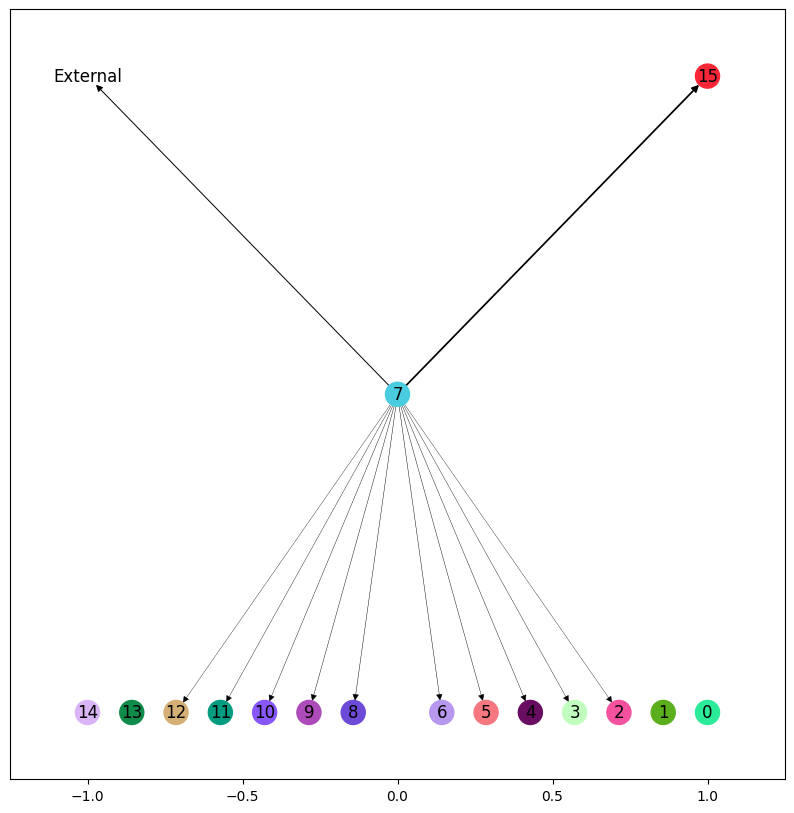

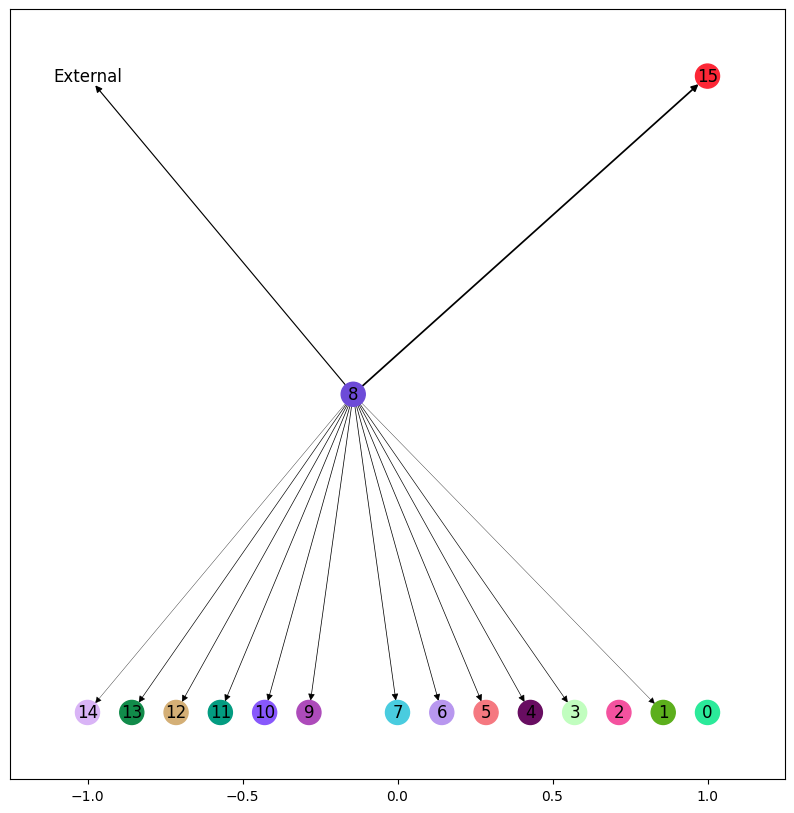

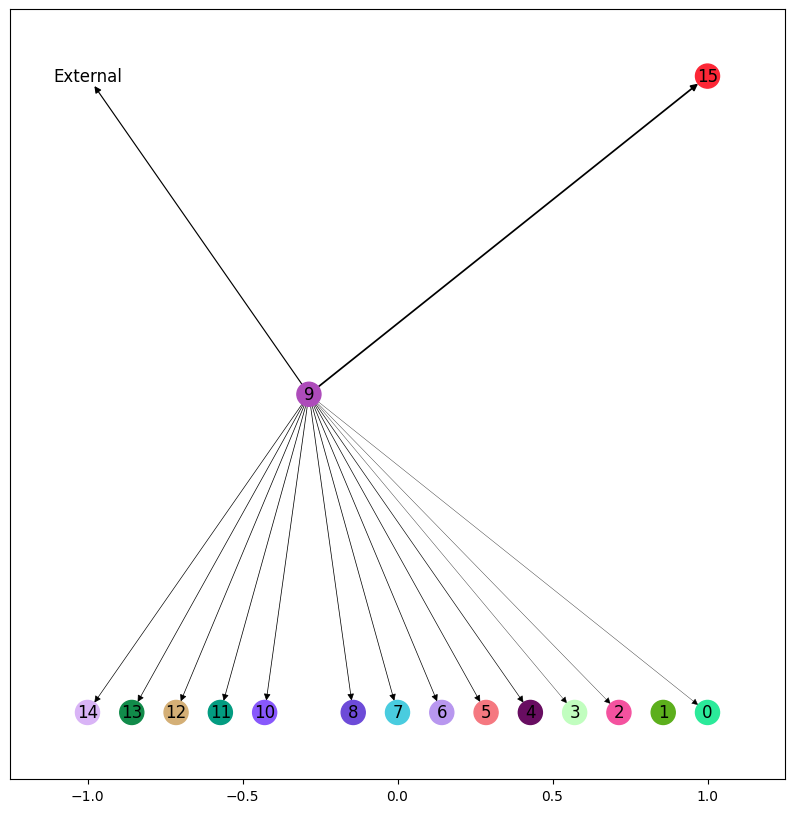

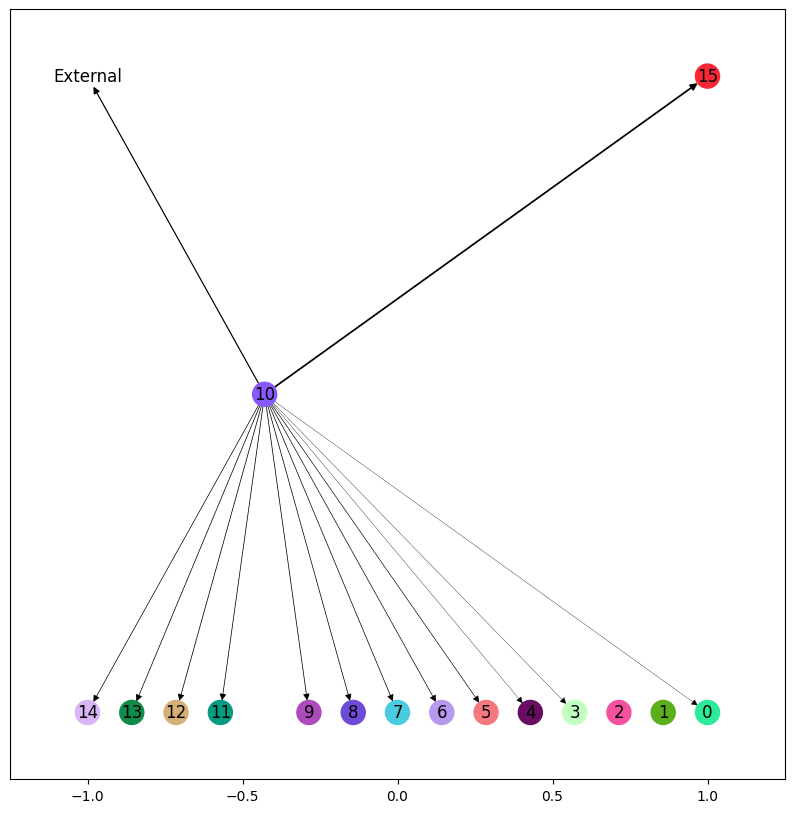

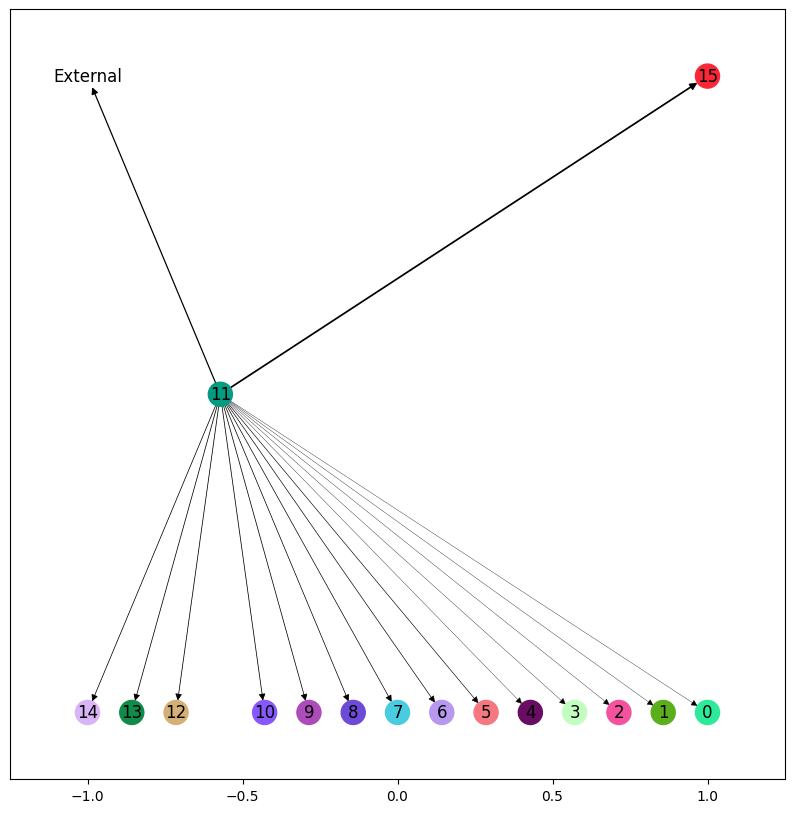

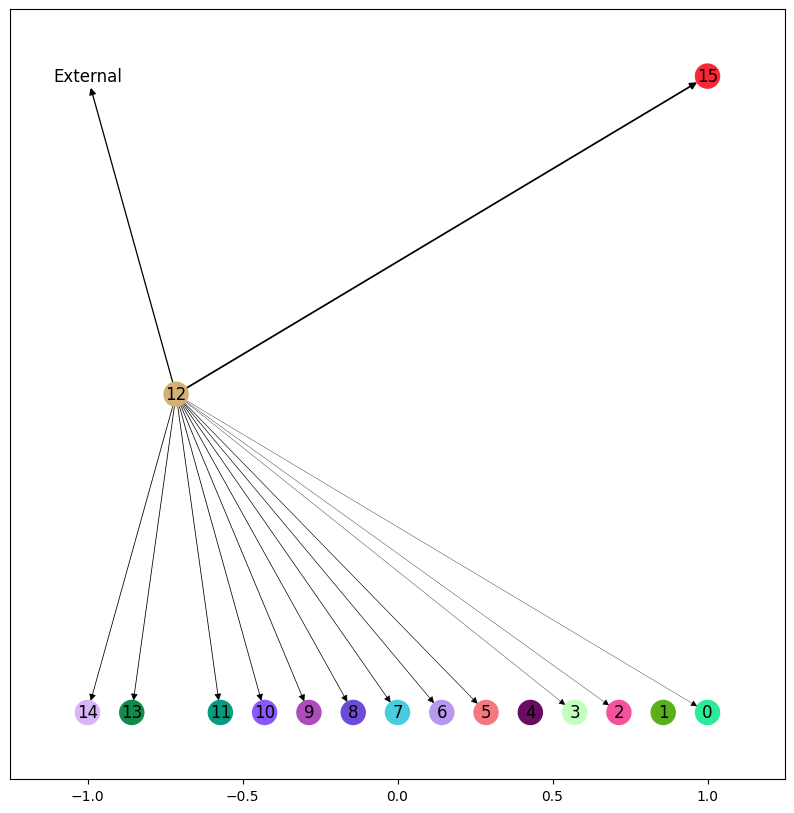

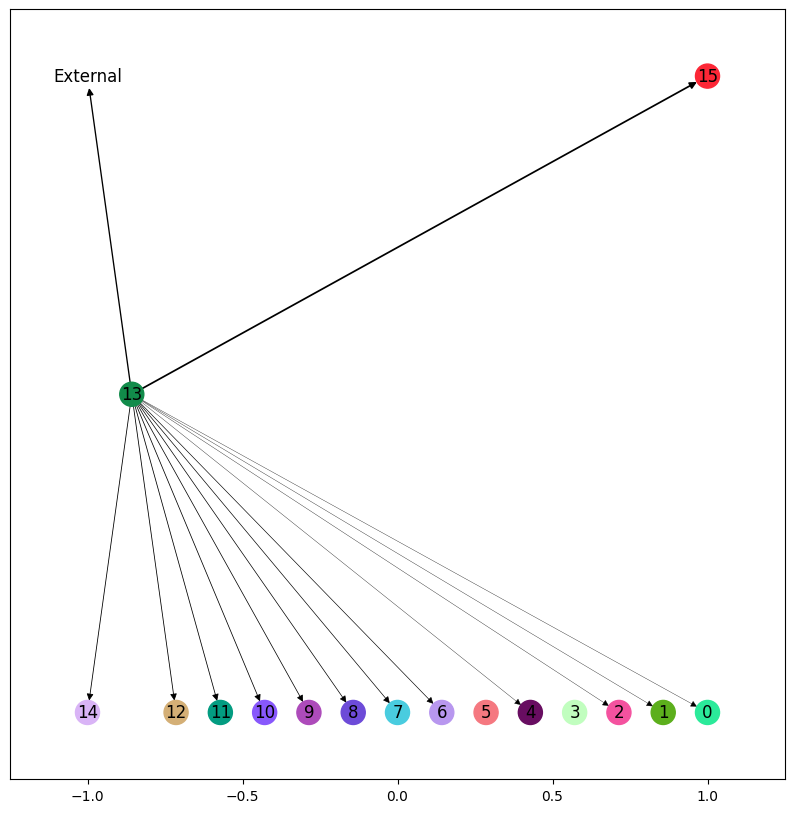

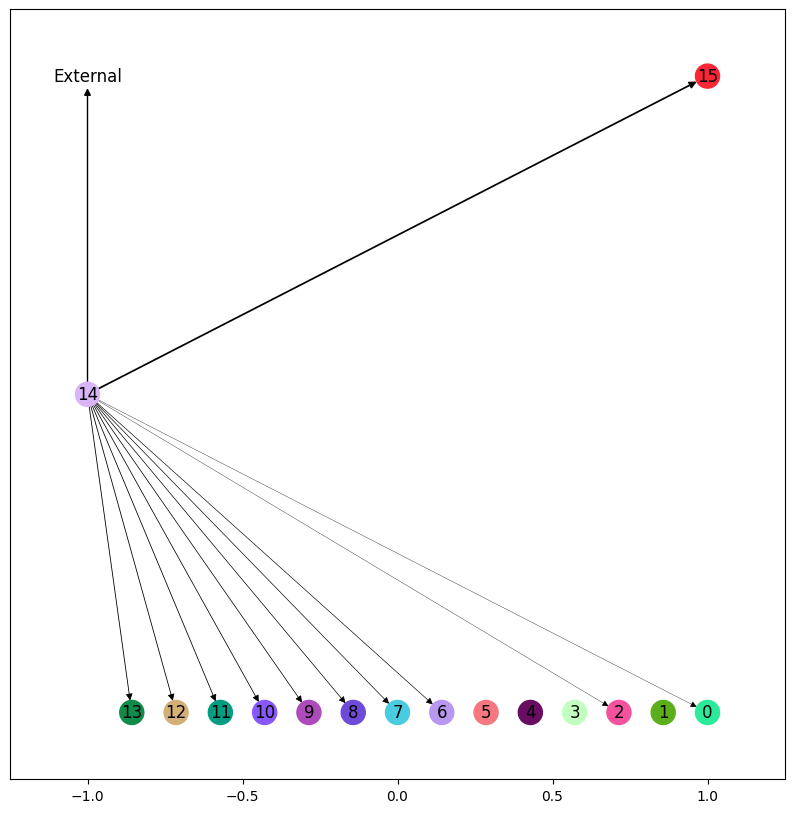

In [36]:
for consumer in content_market.consumers:
    visualize.visualize_consumer(content_market, stats.consumer_stats[consumer.index], agent_colors)

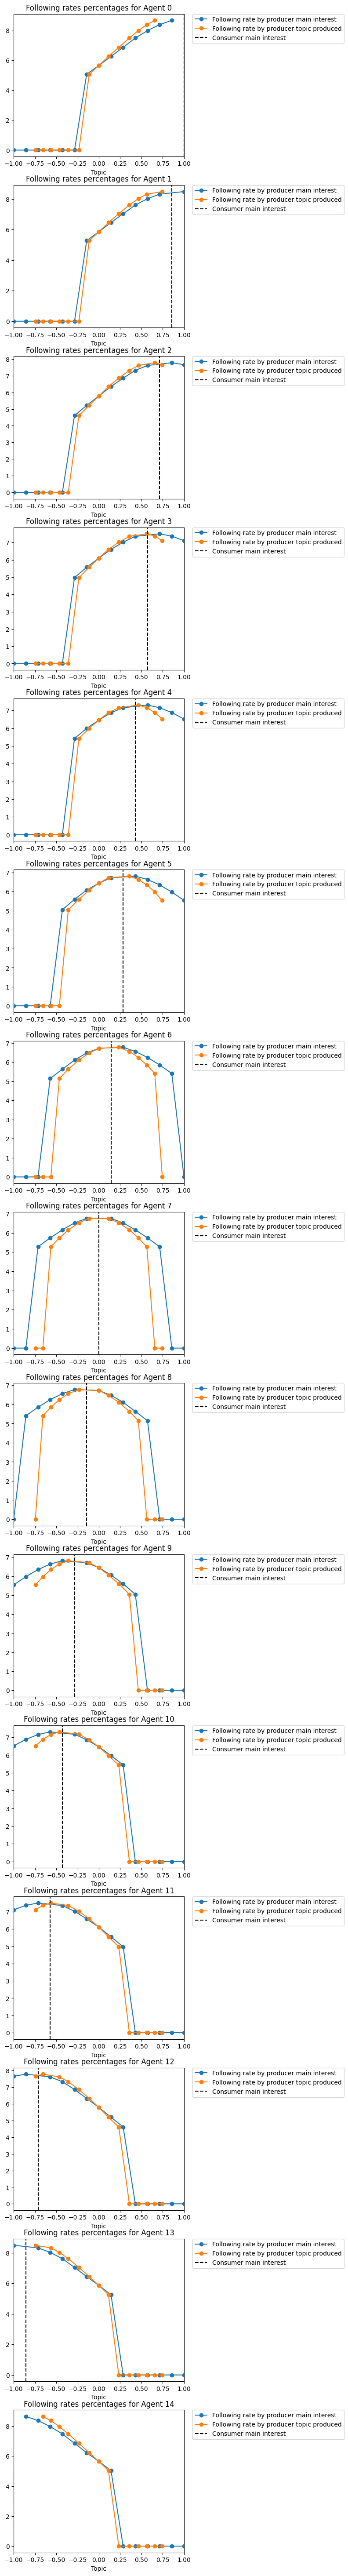

In [37]:
visualize.plot_agent_following_rates(content_market.consumers, stats.consumer_stats, agent_colors)

In [38]:
stats.to_dict()

{'num_iterations': 3,
 'total_consumer_utility': [0,
  165.097981380595,
  165.4293824085833,
  165.4351216549787],
 'total_producer_utility': [0,
  132.17837349682765,
  132.59716173774228,
  132.6241699266291],
 'total_influencer_utility': [0,
  80.80738080100525,
  80.83959291596494,
  80.81809464460278],
 'total_social_welfare': [0,
  165.097981380595,
  165.4293824085833,
  165.4351216549787],
 'average_consumer_rate_change': [0,
  5.059455628865421,
  0.2612808171019875,
  0.058855559506585386],
 'average_producer_topic_change': [0,
  0.15069323310796723,
  0.0381792259714157,
  0.002711923168509862],
 'average_influencer_rate_change': [0,
  0.7487287370001537,
  0.23518627293885777,
  0.008482193340748474],
 'average_consumer_utility_change': [0,
  11.006532092039667,
  0.02209340186588591,
  0.00038261642636084524],
 'average_producer_utility_change': [0,
  8.811891566455177,
  0.02791921606097579,
  0.0018005459257856534],
 'average_influencer_utility_change': [0,
  80.8073808

In [39]:
sorted([c.main_interest for c in content_market.consumers])

[array([-1.]),
 array([-0.85714286]),
 array([-0.71428571]),
 array([-0.57142857]),
 array([-0.42857143]),
 array([-0.28571429]),
 array([-0.14285714]),
 array([0.]),
 array([0.14285714]),
 array([0.28571429]),
 array([0.42857143]),
 array([0.57142857]),
 array([0.71428571]),
 array([0.85714286]),
 array([1.])]